In [241]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [242]:
df = pd.read_csv("data/bank-additional.csv", sep=";")

In [243]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [244]:
df.shape

(4119, 21)

In [245]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [206]:
# columns = ['age','duration','euribor3m','nr.employed', 'y']

In [246]:
# df = df[columns]

In [250]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [251]:
df.shape

(4119, 21)

In [253]:
# df.to_csv("selected_data.csv", index=None)

## 特征的选择
* 选择全部特征进行分类依据
* 选择 age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m,  nr.employed作为数值型特征
* 选择 job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome作为非数值特征处理

In [254]:
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0


In [255]:
df.shape

(4119, 21)

In [256]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [257]:
y = df['y']
X = df.drop('y', axis=1)

In [258]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [259]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,8,4,156,6
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,207,8
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,225,10
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,222,10
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,201,9


In [217]:
X.shape

(4119, 4)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

In [220]:
columns = X_train.columns

In [221]:
columns

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')

In [222]:
X_test.columns

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')

## 特征选取


In [155]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
 
dataset = datasets.load_iris()
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
#打印出每个特征的重要性
print(model.feature_importances_)

[0.07479048 0.05422539 0.34697816 0.52400597]


/home/kongweikun/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [161]:
feature_importance = model_tree.feature_importances_

In [162]:
feature_importance

array([0.0960503 , 0.02648293, 0.01007691, 0.03022968, 0.00671993,
       0.01888142, 0.00832653, 0.00712307, 0.01353406, 0.04245396,
       0.35381732, 0.03329762, 0.02500202, 0.01077384, 0.01566243,
       0.        , 0.01998642, 0.0299264 , 0.06827393, 0.18338122])

In [163]:
len(feature_importance)

20

In [164]:
columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,16))    # 设置画布大小

<Figure size 1440x1152 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

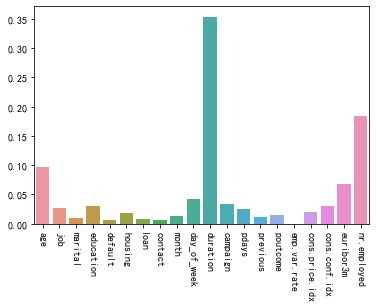

In [177]:
sns.barplot(x=columns, y=feature_importance)
plt.xticks(rotation=-90)    # 设置x轴标签旋转角度


In [179]:
fea_im = {}
for i, v in zip(columns, feature_importance):
    fea_im[i] = v

In [181]:
fea_im = sorted(fea_im, key= lambda x:x[1], reverse=True)

In [182]:
fea_im

['duration',
 'euribor3m',
 'previous',
 'nr.employed',
 'job',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'cons.price.idx',
 'cons.conf.idx',
 'emp.var.rate',
 'age',
 'default',
 'education',
 'pdays',
 'marital',
 'day_of_week',
 'campaign']

## 第二次的特征选择

In [188]:
from sklearn.feature_selection import SelectFromModel

In [189]:
model_treeII = SelectFromModel(model_tree, prefit=True)


In [192]:
X_new = model_treeII.transform(X)

In [193]:
X_new.shape

(4119, 4)

In [200]:
X_new[0]

array([ 12, 474, 156,   6])

In [197]:
X.shape

(4119, 20)

## 数据标准化&&构建决策树模型

In [223]:
X.head()

,age,duration,euribor3m,nr.employed
0,12,474,156,6
1,21,343,207,8
2,7,224,225,10
3,20,14,222,10
4,29,55,201,9


In [224]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_y = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [225]:
# 构建决策树模型
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 评价模型准确性

In [226]:
from sklearn.model_selection import cross_val_score

In [227]:
score = cross_val_score(model_tree, X, y, cv=5, scoring='accuracy')

In [187]:
## 第一次评分
## score.mean()

0.8875900377389246

In [228]:
score.mean()

0.8832155043814259

## 绘图


In [229]:
df.head()

,age,duration,euribor3m,nr.employed,y
0,12,474,156,6,0
1,21,343,207,8,0
2,7,224,225,10,0
3,20,14,222,10,0
4,29,55,201,9,0


In [230]:
df.shape

(4119, 5)

In [231]:
df.to_csv("clean_data.csv", index=None)

In [233]:
columns = ['age','duration','euribor3m','nr.employed', 'y']

In [234]:
# 可视化树图
data_ = pd.read_csv("data/bank-additional.csv",sep=";")
data_ = data_[columns]
data_feature_name = data_.columns[1:]

In [235]:
data_target_name = np.unique(data_["y"])

In [236]:
data_target_name

array(['no', 'yes'], dtype=object)

In [237]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

In [238]:
import os

In [239]:
dot_tree = tree.export_graphviz(model_tree,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
graph.write_png("out.png")

True

## 数据的导出

In [260]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,8,4,156,6
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,207,8
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,225,10
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,222,10
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,201,9


In [263]:
X.to_csv("原数据集2数字无标签.csv", index=None)

In [265]:
X.shape

(4119, 20)

In [266]:
y.shape

(4119,)

In [267]:
X['y'] = y

In [268]:
X.shape

(4119, 21)

In [269]:
X.to_csv("原数据集2数字有标签.csv", index=None)

In [270]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [273]:
len(X['duration'])

4119

In [274]:
len(X['duration'].unique())

828